### Session 3 Exercises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import math
import warnings

datapath = Path('data')

quakes = pd.read_csv(datapath / Path('earthquake.csv'))
faang = pd.read_csv(datapath / Path('faang.csv'), index_col='date', parse_dates=True)
covid_parsed = pd.read_pickle(datapath / Path('covid_parsed.pkl'))

## 1

- Read in the data in the covid.csv file
- Create a date column by parsing the dateRep column into a datetime
- Set the date column as the index
- Use the replace() method to update all occurrences of United_States_of_America and United Kingdom to USA and UK, respectively
- Sort the index

In [16]:
# Read in the data in the covid.csv file
covid = pd.read_csv(datapath / Path('covid.csv'))

# Print the dataframe to view the data
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159
...,...,...,...,...,...,...,...,...,...,...,...,...
43713,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43714,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43715,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43716,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [21]:
#Create a date column by parsing the dateRep column into a datetime

# Convert 'dateRep' column to datetime format
covid['parsed_date'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')

# Print the updated DataFrame
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,parsed_date
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645,2020-09-19
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,2020-09-18
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,2020-09-17
3,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649,2020-09-16
4,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159,2020-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43713,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-25
43714,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-24
43715,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-23
43716,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-22


In [28]:
# Set the date column as the index
date_column_name = 'parsed_date'

# Check if the column exists in the DataFrame
if date_column_name in covid.columns:
    covid.set_index(date_column_name, inplace=True)
    print(covid.head())
else:
    print(f"Column '{date_column_name}' not found in the DataFrame.")

                dateRep  day  month  year  cases  deaths  \
parsed_date                                                
2020-09-19   19/09/2020   19      9  2020     47       1   
2020-09-18   18/09/2020   18      9  2020      0       0   
2020-09-17   17/09/2020   17      9  2020     17       0   
2020-09-16   16/09/2020   16      9  2020     40      10   
2020-09-15   15/09/2020   15      9  2020     99       6   

            countriesAndTerritories geoId countryterritoryCode  popData2019  \
parsed_date                                                                   
2020-09-19              Afghanistan    AF                  AFG   38041757.0   
2020-09-18              Afghanistan    AF                  AFG   38041757.0   
2020-09-17              Afghanistan    AF                  AFG   38041757.0   
2020-09-16              Afghanistan    AF                  AFG   38041757.0   
2020-09-15              Afghanistan    AF                  AFG   38041757.0   

            continentExp 

In [33]:
# Update all occurrences of United_States_of_America and United_Kingdom to USA and UK respectively
covid['countriesAndTerritories'] = covid['countriesAndTerritories'].replace('United_States_of_America', 'USA')
covid['countriesAndTerritories'] = covid['countriesAndTerritories'].replace('United_Kingdom', 'UK')

# Define custom sorting order
custom_order = ['UK', 'USA']

# Sort the index based on the custom sorting order
covid.sort_values(by='countriesAndTerritories', key=lambda x: x.map({k: i for i, k in enumerate(custom_order)}), inplace=True)
covid.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
parsed_date,,,,,,,,,,,,
2020-09-19,19/09/2020,19,9,2020,4322,27,UK,UK,GBR,66647112.0,Europe,65.396682
2020-05-11,11/05/2020,11,5,2020,2157,217,UK,UK,GBR,66647112.0,Europe,81.247331
2020-09-18,18/09/2020,18,9,2020,3395,21,UK,UK,GBR,66647112.0,Europe,61.822634
2020-09-17,17/09/2020,17,9,2020,3991,20,UK,UK,GBR,66647112.0,Europe,59.331903
2020-09-16,16/09/2020,16,9,2020,3103,27,UK,UK,GBR,66647112.0,Europe,55.606310
2020-09-15,15/09/2020,15,9,2020,2621,9,UK,UK,GBR,66647112.0,Europe,52.893515
2020-09-14,14/09/2020,14,9,2020,3330,5,UK,UK,GBR,66647112.0,Europe,51.070480
2020-09-13,13/09/2020,13,9,2020,3497,9,UK,UK,GBR,66647112.0,Europe,48.647269
2020-09-12,12/09/2020,12,9,2020,3539,6,UK,UK,GBR,66647112.0,Europe,45.062718


In [34]:
# Update all occurrences of United_States_of_America and United Kingdom to USA and UK respectively
covid['countriesAndTerritories'] = covid['countriesAndTerritories'].replace('United_States_of_America', 'USA')
covid['countriesAndTerritories'] = covid['countriesAndTerritories'].replace('United_Kingdom', 'UK')

# Define custom sorting order
custom_order = ['USA', 'UK']

# Sort the index based on the custom sorting order
covid.sort_values(by='countriesAndTerritories', key=lambda x: x.map({k: i for i, k in enumerate(custom_order)}), inplace=True)
covid.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
parsed_date,,,,,,,,,,,,
2019-12-31,31/12/2019,31,12,2019,0,0,USA,US,USA,329064917.0,America,NaN
2020-07-16,16/07/2020,16,7,2020,67717,953,USA,US,USA,329064917.0,America,247.006277
2020-05-13,13/05/2020,13,5,2020,22048,1703,USA,US,USA,329064917.0,America,108.605014
2020-06-17,17/06/2020,17,6,2020,23705,836,USA,US,USA,329064917.0,America,92.963420
2020-06-18,18/06/2020,18,6,2020,25559,754,USA,US,USA,329064917.0,America,94.744223
2020-06-19,19/06/2020,19,6,2020,27762,717,USA,US,USA,329064917.0,America,96.756592
2020-06-20,20/06/2020,20,6,2020,29909,678,USA,US,USA,329064917.0,America,98.194302
2020-06-21,21/06/2020,21,6,2020,34158,607,USA,US,USA,329064917.0,America,101.821246
2020-06-22,22/06/2020,22,6,2020,25793,256,USA,US,USA,329064917.0,America,102.882131


In [35]:
# Sort the index
covid_parsed.sort_index(inplace=True)

# Display the updated DataFrame
print(covid_parsed.head())

               dateRep  day  month  year  cases  deaths  \
date                                                      
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   

           countriesAndTerritories geoId countryterritoryCode  popData2019  \
date                                                                         
2020-01-18                 Croatia    HR                  HRV    4076246.0   
2020-01-18                  Greece    EL                  GRC   10724599.0   
2020-01-18                      UK    UK                  GBR   66647112.0   
2020-01-18              Azerbaijan    AZ                  AZE   10047719.0   
2020-01-18                 Bahrain    BH                  BHR    1641164.0   

           continentExp  \
date        

## 2
With the `earthquake.csv` file, select all earthquakes in Japan with a magnitude of 4 or greater. Display them sorted by time. Only output the magnitude and the place.

In [38]:
# Read earthquake/quake- file
quakes = pd.read_csv(datapath / Path('earthquake.csv'))

# Print the dataframe to view the data
quakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


In [44]:

# Read earthquake data from the CSV file
quakes = pd.read_csv('earthquake.csv', parse_dates=['time'])

# Filter earthquakes in Japan with a magnitude of 4 or greater
japan_earthquakes = quakes[(quakes['mag'] >= 4) & (quakes['place'].str.contains('Japan', case=False, na=False))]

# Display selected columns sorted by time
result = japan_earthquakes[['mag', 'place', 'time']].sort_values(by='time')

# Print the result
print(result[['mag', 'place']])

      mag                             place
9198  4.6          3km ESE of Sugito, Japan
9083  5.1     23km ENE of Ishinomaki, Japan
9070  4.7           96km E of Hasaki, Japan
8687  4.2          39km NE of Misawa, Japan
8555  4.6        105km ENE of Miyako, Japan
8550  4.4        105km ENE of Miyako, Japan
8431  4.6            171km E of Nago, Japan
8376  4.4            171km E of Nago, Japan
8327  4.2        34km ESE of Chitose, Japan
8324  4.6            167km E of Nago, Japan
8311  4.4            166km E of Nago, Japan
8071  4.4           67km E of Nemuro, Japan
7832  5.3            169km E of Nago, Japan
7807  4.4   67km NNE of Hachijo-jima, Japan
7696  4.0         65km E of Shizunai, Japan
7652  4.2            164km E of Nago, Japan
7408  4.8         65km SSE of Hasaki, Japan
7381  4.6    9km ENE of Funaishikawa, Japan
7261  4.1          64km ESE of Owase, Japan
7145  4.1         97km N of Mombetsu, Japan
7066  4.4        35km E of Tomakomai, Japan
7001  4.3        25km ESE of Mur

## 3
Create bins for each full number of earthquake magnitude (magType = 'ml') and count how many are in each bin. Output them in magnitude order.

In [47]:
# Filter earthquakes with magnitude type 'ml'
ml_quakes = quakes[quakes['magType'] == 'ml'].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Create bins for each full number of earthquake magnitude
bins = list(range(int(ml_quakes['mag'].min()), int(ml_quakes['mag'].max()) + 2))

# Create a new column 'magnitude_bin' based on the bins
ml_quakes['magnitude_bin'] = pd.cut(ml_quakes['mag'], bins=bins, right=False, include_lowest=True)

# Count the number of earthquakes in each bin
earthquake_counts = ml_quakes.groupby('magnitude_bin').size().reset_index(name='count')

# Sort by magnitude
earthquake_counts.sort_values(by='magnitude_bin', inplace=True)

# Print the result
print(earthquake_counts)

  magnitude_bin  count
0       [-1, 0)    446
1        [0, 1)   2072
2        [1, 2)   3126
3        [2, 3)    985
4        [3, 4)    153
5        [4, 5)      6
6        [5, 6)      2


## 4
Using the `faang.csv`: Group by ticker and resample to monthly.

Make the following aggregations:
- Mean opening price
- Max high price
- Min low price
- Mean closing price
- Sum of volume traded

Floating point numbers should have two decimals.

In [51]:
# Read faang csv file
faang = pd.read_csv(datapath / Path('faang.csv'), index_col='date', parse_dates=True)

# Print data from dataframe
faang

,ticker,high,low,open,close,volume
date,,,,,,
2018-01-02,FB,181.580002,177.550003,177.679993,181.419998,18151900.0
2018-01-03,FB,184.779999,181.330002,181.880005,184.669998,16886600.0
2018-01-04,FB,186.210007,184.100006,184.899994,184.330002,13880900.0
2018-01-05,FB,186.899994,184.929993,185.589996,186.850006,13574500.0
2018-01-08,FB,188.899994,186.330002,187.199997,188.279999,17994700.0
...,...,...,...,...,...,...
2018-12-24,GOOG,1003.539978,970.109985,973.900024,976.219971,1590300.0
2018-12-26,GOOG,1040.000000,983.000000,989.010010,1039.459961,2373300.0
2018-12-27,GOOG,1043.890015,997.000000,1017.150024,1043.880005,2109800.0


In [52]:
# Group by ticker and resample to monthly.

# Read the faang.csv file
faang = pd.read_csv('faang.csv', index_col='date', parse_dates=True)

# Group by ticker and resample to monthly frequency
faang_monthly = faang.groupby('ticker').resample('M').last()

# Print the result
print(faang_monthly)

                  ticker         high          low         open        close  \
ticker date                                                                    
AAPL   2018-01-31   AAPL    42.110001    41.625000    41.717499    41.857498   
       2018-02-28   AAPL    45.154999    44.512501    44.814999    44.529999   
       2018-03-31   AAPL    42.937500    41.724998    41.952499    41.945000   
       2018-04-30   AAPL    41.814999    40.459999    40.532501    41.314999   
       2018-05-31   AAPL    47.057499    46.535000    46.805000    46.717499   
       2018-06-30   AAPL    46.797501    45.727501    46.572498    46.277500   
       2018-07-31   AAPL    48.035000    47.334999    47.575001    47.572498   
       2018-08-31   AAPL    57.217499    56.500000    56.627499    56.907501   
       2018-09-30   AAPL    56.459999    56.005001    56.197498    56.435001   
       2018-10-31   AAPL    55.112499    54.154999    54.220001    54.715000   
       2018-11-30   AAPL    45.082500   

In [53]:
#Mean opening price

# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Group by 'ticker' and calculate the mean opening price with two decimal places
mean_opening_price = faang.groupby('ticker')['open'].mean().round(2)

# Print the result
print(mean_opening_price)

ticker
AAPL      47.28
AMZN    1644.07
FB       171.47
GOOG    1113.55
NFLX     319.62
Name: open, dtype: float64


In [54]:
# Max high price 

# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Group by 'ticker' and calculate the maximum high price with two decimal places
max_high_price = faang.groupby('ticker')['high'].max().round(2)

# Print the result
print(max_high_price)

ticker
AAPL      58.37
AMZN    2050.50
FB       218.62
GOOG    1273.89
NFLX     423.21
Name: high, dtype: float64


In [55]:
# Min low price

# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Group by 'ticker' and calculate the minimum low price with two decimal places
min_low_price = faang.groupby('ticker')['low'].min().round(2)

# Print the result
print(min_low_price)

ticker
AAPL      36.65
AMZN    1170.51
FB       123.02
GOOG     970.11
NFLX     195.42
Name: low, dtype: float64


In [56]:
# Mean closing price

# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Group by 'ticker' and calculate the mean closing price with two decimal places
mean_closing_price = faang.groupby('ticker')['close'].mean().round(2)

# Print the result
print(mean_closing_price)

ticker
AAPL      47.26
AMZN    1641.73
FB       171.51
GOOG    1113.23
NFLX     319.29
Name: close, dtype: float64


In [59]:
# Sum of volume traded

# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Group by 'ticker' and calculate the sum of the volume traded, rounded to two decimal places
sum_volume_traded = faang.groupby('ticker')['volume'].sum().round(2)

# Format the result to have commas as thousands separators
formatted_sum_volume_traded = sum_volume_traded.map('{:,.2f}'.format)

# Print the formatted result
print(formatted_sum_volume_traded)

ticker
AAPL    34,156,144,800.00
AMZN     1,417,897,600.00
FB       6,942,307,800.00
GOOG       437,233,300.00
NFLX     2,878,875,800.00
Name: volume, dtype: object


## 5

Calculate the z-scores for each numeric column of Amazon's data (faang.csv) but only for Q4 of 2018

In [61]:
# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Filter data for Amazon (AMZN) in Q4 of 2018
amazon_q4_2018 = faang[(faang['ticker'] == 'AMZN') & (faang['date'].dt.year == 2018) & (faang['date'].dt.quarter == 4)]

# Exclude non-numeric columns from z-score calculation
numeric_columns = amazon_q4_2018.select_dtypes(include=['float64', 'int64']).columns
z_scores_amazon_q4_2018 = (amazon_q4_2018[numeric_columns] - amazon_q4_2018[numeric_columns].mean()) / amazon_q4_2018[numeric_columns].std()

# Print the z-scores for Amazon in Q4 of 2018
print(z_scores_amazon_q4_2018)

         high       low      open     close    volume
690  2.368006  2.502113  2.337813  2.385848 -1.630411
691  2.227302  2.247433  2.190795  2.155037 -0.861879
692  2.058955  2.139987  2.068570  2.025489 -0.920345
693  1.819474  1.781561  1.850048  1.722816 -0.126582
694  1.628173  1.554416  1.642819  1.584748 -0.298771
..        ...       ...       ...       ...       ...
748 -2.159820 -2.187566 -2.179582 -2.226185 -0.141238
749 -1.611714 -1.810493 -2.026617 -1.339674  1.123063
750 -1.641276 -1.626703 -1.456521 -1.404343  0.849827
751 -1.325261 -1.231588 -1.328549 -1.289951  0.496102
752 -1.273456 -0.975763 -1.078283 -1.122691 -0.246405

[63 rows x 5 columns]


## 6
Represent all the values in the FAANG dataset in terms of the first date in the data. To do so, divide all values for each ticker by the values of the first date in the data for that ticker. When data is in this format, we can easily see growth over time.
Show only the first 5 days per ticker.

In [5]:
# Read the faang.csv file
faang = pd.read_csv('faang.csv', parse_dates=True)

# Convert 'date' to datetime format
faang['date'] = pd.to_datetime(faang['date'])

# Group by 'ticker' and calculate the ratio of each value to the first date's value for that ticker
faang_ratio = (
    faang.set_index(['ticker', 'date'])
    .groupby('ticker', group_keys=False)
    .apply(lambda x: x / x.iloc[0])
    .reset_index()
)

# Display only the first 5 days per ticker
first_5_days_per_ticker = faang_ratio.groupby('ticker').head(5)

# Print the result
print(first_5_days_per_ticker)

     ticker       date      high       low      open     close    volume
0        FB 2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
1        FB 2018-01-03  1.017623  1.021290  1.023638  1.017914  0.930294
2        FB 2018-01-04  1.025498  1.036891  1.040635  1.016040  0.764708
3        FB 2018-01-05  1.029298  1.041566  1.044518  1.029931  0.747828
4        FB 2018-01-08  1.040313  1.049451  1.053579  1.037813  0.991340
251    AAPL 2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
252    AAPL 2018-01-03  1.013059  1.015952  1.013928  0.999826  1.155033
253    AAPL 2018-01-04  1.006790  1.016661  1.013987  1.004470  0.877864
254    AAPL 2018-01-05  1.017818  1.022392  1.019276  1.015906  0.925814
255    AAPL 2018-01-08  1.019211  1.027591  1.024624  1.012133  0.804816
502    AMZN 2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
503    AMZN 2018-01-03  1.013017  1.015199  1.013908  1.012775  1.153758
504    AMZN 2018-01-04  1.021739  1.029175  1.02815

## 7
In the 
In the earthquake dataset you want to only leave data for the top 5 countries in terms of number of earthquakes for magType 'ml', 'md' and 'mb'.
Also show the number of earthquakes per country for the above.

In [13]:
# Load the earthquake dataset
quakes = pd.read_csv('earthquake.csv', parse_dates=['time'])

# Filter data for magType 'ml', 'md', and 'mb'
filtered_data = quakes[quakes['magType'].isin(['ml', 'md', 'mb'])]

# Get the top 5 countries in terms of number of earthquakes
top_countries = filtered_data['parsed_place'].value_counts().head(5).index.tolist()

# Filter data for the top 5 countries
filtered_top_countries = filtered_data[filtered_data['parsed_place'].isin(top_countries)]

# Show the number of earthquakes per country
earthquakes_per_country = filtered_top_countries['parsed_place'].value_counts()

print("Number of earthquakes per country for magTypes 'ml', 'md', and 'mb':")
print(earthquakes_per_country)

# Show the filtered dataset for the top 5 countries
print("\nFiltered data for the top 5 countries:")
filtered_top_countries

Number of earthquakes per country for magTypes 'ml', 'md', and 'mb':
Alaska         3656
California     2856
Nevada          681
Hawaii          367
Puerto Rico     216
Name: parsed_place, dtype: int64

Filtered data for the top 5 countries:


,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


## 8
Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

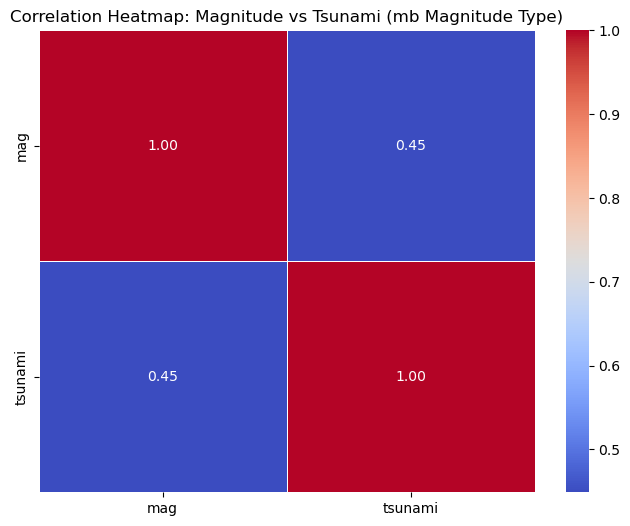

In [14]:
# Read the earthquake.csv file
quakes = pd.read_csv('earthquake.csv', parse_dates=True)

# Filter data for 'mb' magnitude type
mb_quakes = quakes[quakes['magType'] == 'mb']

# Create a correlation matrix
correlation_matrix = mb_quakes[['mag', 'tsunami']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Magnitude vs Tsunami (mb Magnitude Type)')
plt.show()

## 9
For the 5 countries with the most covid cases (cumulative), find the day with the largest number of cases.

In [20]:
# Read the covid.csv file
covid_data = pd.read_csv('covid.csv', parse_dates=['dateRep'])

covid_data = pd.read_csv('covid.csv', parse_dates=['dateRep'], dayfirst=True, date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

# Filter data for the 5 countries with the most cumulative cases
top_countries_cumulative_cases = covid_data.groupby('countriesAndTerritories')['cases'].sum().nlargest(5).index

# Filter the original DataFrame for these countries
top_countries_data = covid_data[covid_data['countriesAndTerritories'].isin(top_countries_cumulative_cases)]

# Find the day with the largest number of cases for each country
day_with_largest_cases = top_countries_data.loc[top_countries_data.groupby('countriesAndTerritories')['cases'].idxmax()]

# Print the result
print(day_with_largest_cases[['dateRep', 'countriesAndTerritories', 'cases']])

C:\Users\danie\AppData\Local\Temp\ipykernel_2948\3777500736.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  covid_data = pd.read_csv('covid.csv', parse_dates=['dateRep'])


         dateRep   countriesAndTerritories  cases
5720  2020-07-30                    Brazil  69074
18921 2020-09-17                     India  97894
31756 2020-08-17                      Peru  10143
33339 2020-07-18                    Russia  12640
41828 2020-07-25  United_States_of_America  78427


## 10
Find the 7-day average change in COVID-19 cases for the last week in the data for the countries found in part 2.

In [21]:
# Read the covid.csv file with explicit date format
covid_data = pd.read_csv('covid.csv', parse_dates=['dateRep'], dayfirst=True, date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

# Filter data for the 5 countries with the most cumulative cases
top_countries_cumulative_cases = covid_data.groupby('countriesAndTerritories')['cases'].sum().nlargest(5).index

# Filter the original DataFrame for these countries
top_countries_data = covid_data[covid_data['countriesAndTerritories'].isin(top_countries_cumulative_cases)]

# Find the last week's data for the selected countries
last_week_data = top_countries_data[top_countries_data['dateRep'] >= top_countries_data['dateRep'].max() - pd.Timedelta(days=6)]

# Calculate the daily change in cases
last_week_data.loc[:, 'daily_change'] = last_week_data.groupby('countriesAndTerritories')['cases'].diff()

# Calculate the 7-day average change
average_change_last_week = last_week_data.groupby('countriesAndTerritories')['daily_change'].rolling(window=7).mean().reset_index()

# Print the result
print(average_change_last_week)

     countriesAndTerritories  level_1  daily_change
0                     Brazil     5669           NaN
1                     Brazil     5670           NaN
2                     Brazil     5671           NaN
3                     Brazil     5672           NaN
4                     Brazil     5673           NaN
5                     Brazil     5674           NaN
6                     Brazil     5675           NaN
7                      India    18919           NaN
8                      India    18920           NaN
9                      India    18921           NaN
10                     India    18922           NaN
11                     India    18923           NaN
12                     India    18924           NaN
13                     India    18925           NaN
14                      Peru    31723           NaN
15                      Peru    31724           NaN
16                      Peru    31725           NaN
17                      Peru    31726           NaN
18          

C:\Users\danie\AppData\Local\Temp\ipykernel_2948\4129214830.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_data.loc[:, 'daily_change'] = last_week_data.groupby('countriesAndTerritories')['cases'].diff()


## 11
Find the first date that each country other than China had cases:

In [22]:
# Read the covid.csv file with explicit date format
covid_data = pd.read_csv('covid.csv', parse_dates=['dateRep'], dayfirst=True, date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

# Filter data for countries other than China
countries_other_than_china = covid_data[covid_data['countriesAndTerritories'] != 'China']

# Find the first date with cases for each country
first_date_with_cases = countries_other_than_china.groupby('countriesAndTerritories')['dateRep'].min().reset_index(name='first_date_with_cases')

# Print the result
print(first_date_with_cases)

    countriesAndTerritories first_date_with_cases
0               Afghanistan            2019-12-31
1                   Albania            2020-03-09
2                   Algeria            2019-12-31
3                   Andorra            2020-03-03
4                    Angola            2020-03-22
..                      ...                   ...
204                 Vietnam            2019-12-31
205          Western_Sahara            2020-04-26
206                   Yemen            2020-04-10
207                  Zambia            2020-03-19
208                Zimbabwe            2020-03-21

[209 rows x 2 columns]


## 12
Rank the countries by maximum total cases using percentiles. Sort by cases. Replace all _ with blank spaces. Show percentiles with two decimals.

In [23]:
# Read the covid.csv file with explicit date format
covid_data = pd.read_csv('covid.csv', parse_dates=['dateRep'], dayfirst=True, date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

# Calculate the maximum total cases for each country
max_total_cases = covid_data.groupby('countriesAndTerritories')['cases'].max().reset_index()

# Rank the countries by maximum total cases using percentiles
max_total_cases['percentile_rank'] = max_total_cases['cases'].rank(pct=True, method='min')

# Sort by cases
max_total_cases = max_total_cases.sort_values(by='cases', ascending=False)

# Replace all _ with blank spaces
max_total_cases['countriesAndTerritories'] = max_total_cases['countriesAndTerritories'].str.replace('_', ' ')

# Show percentiles with two decimals
max_total_cases['percentile_rank'] = (max_total_cases['percentile_rank'] * 100).round(2)

# Print the result
print(max_total_cases[['countriesAndTerritories', 'cases', 'percentile_rank']])

               countriesAndTerritories  cases  percentile_rank
92                               India  97894           100.00
201           United States of America  78427            99.52
27                              Brazil  69074            99.05
41                               Chile  36179            98.57
179                              Spain  27404            98.10
..                                 ...    ...              ...
109                               Laos      4             1.43
24   Bonaire, Saint Eustatius and Saba      4             1.43
144           Northern Mariana Islands      4             1.43
79                           Greenland      3             0.95
5                             Anguilla      2             0.48

[210 rows x 3 columns]


## 13
Write a Python function that matches a word containing 'z', not at the start or end of the word. It should output if it found a match.

In [25]:
def match_word_with_z(word):
    # Define the pattern to match a word containing 'z', not at the start or end
    pattern = r'\b\w*z\w*\b'

    # Use re.search to find a match
    match = re.search(pattern, word)

    # Output if a match is found
    if match:
        print(f"Found a match: {match.group()}")
    else:
        print("No match found")

# Example usage:
word1 = "brazen"
word2 = "amazing"
word3 = "lazy"
word4 = "brazil"

match_word_with_z(word1)
match_word_with_z(word2)
match_word_with_z(word3)
match_word_with_z(word4)

Found a match: brazen
Found a match: amazing
Found a match: lazy
Found a match: brazil


## 14
Write a Python program to remove leading zeros from an IP address (e.g.: 216.08.094.196 should become 216.8.94.196).

In [26]:
def remove_leading_zeros(ip_address):
    # Split the IP address into octets
    octets = ip_address.split('.')

    # Remove leading zeros from each octet
    cleaned_octets = [str(int(octet)) for octet in octets]

    # Join the cleaned octets back into an IP address
    cleaned_ip = '.'.join(cleaned_octets)

    return cleaned_ip

# Example usage:
ip_address_with_zeros = "216.08.094.196"
cleaned_ip_address = remove_leading_zeros(ip_address_with_zeros)

print(f"Original IP address: {ip_address_with_zeros}")
print(f"Cleaned IP address: {cleaned_ip_address}")

Original IP address: 216.08.094.196
Cleaned IP address: 216.8.94.196


## 15
Write a Python program to convert a date of yyyy-mm-dd format to dd-mm-yyyy format.

2026-01-02 should become 02-01-2026

In [27]:
from datetime import datetime

def convert_date_format(input_date):
    # Parse the input date string
    date_object = datetime.strptime(input_date, '%Y-%m-%d')

    # Format the date in dd-mm-yyyy format
    formatted_date = date_object.strftime('%d-%m-%Y')

    return formatted_date

# Example usage:
input_date = "2026-01-02"
converted_date = convert_date_format(input_date)

print(f"Original date: {input_date}")
print(f"Converted date: {converted_date}")

Original date: 2026-01-02
Converted date: 02-01-2026


## 16
Write a Python program to extract year, month and date from an url.

`url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"`

output: [('2016', '09', '02')]

In [31]:
from urllib.parse import urlparse

def extract_date_from_url(url):
    # Parse the URL
    parsed_url = urlparse(url)

    # Extract the path from the URL
    path = parsed_url.path

    # Split the path into segments
    path_segments = path.split('/')

    # Look for the segment that represents the date
    for i in range(len(path_segments) - 2):
        if len(path_segments[i]) == 4 and len(path_segments[i + 1]) == 2 and len(path_segments[i + 2]) == 2:
            # Extract year, month, and date
            year, month, day = path_segments[i], path_segments[i + 1], path_segments[i + 2]
            return [(year, month, day)]

    return []

# Example usage:
url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"
output = extract_date_from_url(url)

print(f"URL: {url}")
print(f"Extracted date: {output}")

URL: https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/
Extracted date: [('2016', '09', '02')]


## 17
Write a Python program to separate and print the numbers of a given string.

`String = "Ten 10, Twenty 20, Thirty 30"`

In [32]:
def extract_numbers_from_string(input_string):
    # Use regex to find all numbers in the string
    numbers = re.findall(r'\d+', input_string)

    return numbers

# Example usage:
input_string = "Ten 10, Twenty 20, Thirty 30"
numbers = extract_numbers_from_string(input_string)

print(f"Original string: {input_string}")
print(f"Extracted numbers: {numbers}")

Original string: Ten 10, Twenty 20, Thirty 30
Extracted numbers: ['10', '20', '30']


## 18
Write a Python program to replace maximum 2 occurrences of space, comma, or dot with a colon.

In [34]:
def replace_delimiters_with_colon(input_string):
    # Replace up to 2 occurrences of space, comma, or dot with a colon
    replaced_string = re.sub(r'[ ,.]+', ':', input_string, count=2)

    return replaced_string

# Example usage:
input_string = "I love Lady, she is the best. I am proud of you."
result = replace_delimiters_with_colon(input_string)

print(f"Original string: {input_string}")
print(f"Modified string: {result}")

Original string: I love Lady, she is the best. I am proud of you.
Modified string: I:love:Lady, she is the best. I am proud of you.


## 19
Write a Python program to extract values between quotation marks of a string.

In [35]:
text1 = '"Python", "PHP", "Java"'

import re

def extract_values_between_quotation_marks(input_text):
    # Use regex to find all values between quotation marks
    values = re.findall(r'"(.*?)"', input_text)

    return values

# Example usage:
text1 = '"Python", "PHP", "Java"'
extracted_values = extract_values_between_quotation_marks(text1)

print(f"Original text: {text1}")
print(f"Extracted values: {extracted_values}")

Original text: "Python", "PHP", "Java"
Extracted values: ['Python', 'PHP', 'Java']


## 20
Write a Python program to remove multiple spaces in a string.

In [36]:
text1 = 'Python      Exercises'

def remove_multiple_spaces(input_text):
    # Use regex to replace multiple spaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', input_text)

    return cleaned_text.strip()

# Example usage:
text1 = 'Python      Exercises'
cleaned_text = remove_multiple_spaces(text1)

print(f"Original text: {text1}")
print(f"Cleaned text: {cleaned_text}")

Original text: Python      Exercises
Cleaned text: Python Exercises


## 21
Write a Python program to find all adverbs (ending on ly) and their positions in a given sentence.

In [3]:
text = "Clearly, he has no excuse for such lying behavior."

def find_adverbs_positions(input_text):
    # Use regex to find all adverbs ending in "ly"
    adverbs_matches = re.finditer(r'\b\w+ly\b', input_text)

    # Extract adverbs and their positions
    adverbs_positions = [(match.group(), match.start()) for match in adverbs_matches]

    return adverbs_positions

# Example usage:
text = "Clearly, he has no excuse for such lying behavior."
adverbs_positions = find_adverbs_positions(text)

print(f"Original text: {text}")
print(f"Adverbs and their positions: {adverbs_positions}")


Original text: Clearly, he has no excuse for such lying behavior.
Adverbs and their positions: [('Clearly', 0)]


## 22
Write a Python program to concatenate the consecutive numbers in a given string.

Sample text:
Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.

Sample solution:
Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.

In [4]:
txt = "Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready."

def concatenate_consecutive_numbers(input_text):
    # Use regex to find consecutive numbers and concatenate them
    result_text = re.sub(r'(\b\d+)\s+(\d+\b)', lambda match: match.group(1) + match.group(2), input_text)

    return result_text

# Example usage:
txt = "Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready."
result = concatenate_consecutive_numbers(txt)

print(f"Original text: {txt}")
print(f"Modified text: {result}")

Original text: Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.
Modified text: Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.


## 23
Write a Python function that checks whether a word stars and ends with a vowel in a given string. Return true if a word matches the condition; otherwise, return false.

Sample Data:
- ("Red Orange White") -> True
- ("Red White Black") -> False
- ("abcd dkise eosksu") -> True

In [7]:
def word_starts_and_ends_with_vowel(input_string):
    # Split the string into words
    words = input_string.split()

    # Check each word
    for word in words:
        # Check if the word starts and ends with a vowel
        if word and word[0].lower() in 'aeiou' and word[-1].lower() in 'aeiou':
            return True

    # No matching word found
    return False

# Example usage:
sample_data1 = "Red Orange White"
sample_data2 = "Red White Black"
sample_data3 = "abcd dkise eosksu"

result1 = word_starts_and_ends_with_vowel(sample_data1)
result2 = word_starts_and_ends_with_vowel(sample_data2)
result3 = word_starts_and_ends_with_vowel(sample_data3)

print(f"{sample_data1} -> {result1}")
print(f"{sample_data2} -> {result2}")
print(f"{sample_data3} -> {result3}")

Red Orange White -> True
Red White Black -> False
abcd dkise eosksu -> True


## 24
Write a Python program to separate and print the numbers and their position of a given string.

In [8]:
text = "The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly."

def extract_numbers_and_positions(input_text):
    # Use regex to find all numbers and their positions
    matches = re.finditer(r'\b\d+\b', input_text)

    # Extract numbers and their positions
    numbers_positions = [(match.group(), match.start()) for match in matches]

    return numbers_positions

# Example usage:
text = "The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly."

result = extract_numbers_and_positions(text)

print(f"Original text: {text}")
print(f"Numbers and their positions: {result}")

Original text: The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly.
Numbers and their positions: [('50', 30), ('50', 65)]


## 25
The given input strings contains some text followed by - followed by a number. Replace that number with its log value using math.log()

- `s1 = 'first-3.14'`
- `s2 = 'next-123'`

In [9]:
s1 = 'first-3.14'
s2 = 'next-123'

def replace_number_with_log(input_string):
    # Use regex to find the number after the hyphen
    match = re.search(r'-(\d+(\.\d+)?)', input_string)

    if match:
        # Extract the number
        number_str = match.group(1)
        number = float(number_str)

        # Replace the number with its log value
        log_value = math.log(number)
        result_string = re.sub(r'-\d+(\.\d+)?', f'-{log_value}', input_string)

        return result_string

    return input_string  # Return the original string if no match is found

# Example usage:
s1 = 'first-3.14'
s2 = 'next-123'

result1 = replace_number_with_log(s1)
result2 = replace_number_with_log(s2)

print(f"Original string 1: {s1}")
print(f"Modified string 1: {result1}")

print(f"Original string 2: {s2}")
print(f"Modified string 2: {result2}")

Original string 1: first-3.14
Modified string 1: first-1.144222799920162
Original string 2: next-123
Modified string 2: next-4.812184355372417


## 26
Extract all words between ( and ) from the given input string as a list. Assume that the input will not contain any broken parentheses.

Text:
`ip = 'another (way) to reuse (portion) matched (by) capture groups'`

In [10]:
ip = 'another (way) to reuse (portion) matched (by) capture groups'

def extract_words_between_parentheses(input_string):
    # Use regex to find all words between parentheses
    matches = re.findall(r'\((.*?)\)', input_string)

    return matches

# Example usage:
ip = 'another (way) to reuse (portion) matched (by) capture groups'
result = extract_words_between_parentheses(ip)

print(f"Input string: {ip}")
print(f"Words between parentheses: {result}")

Input string: another (way) to reuse (portion) matched (by) capture groups
Words between parentheses: ['way', 'portion', 'by']


## 27
Add [] around words starting with s and containing e and t in any order.

text:
`ip = 'sequoia subtle exhibit asset sets2 tests si_te'`

In [11]:
ip = 'sequoia subtle exhibit asset sets2 tests si_te'

def add_brackets_around_words(input_string):
    # Use regex to add [] around words starting with 's' and containing 'e' and 't'
    result_string = re.sub(r'\bs[^ ]*e[^ ]*t[^ ]*\b', lambda match: '[' + match.group() + ']', input_string)

    return result_string

# Example usage:
ip = 'sequoia subtle exhibit asset sets2 tests si_te'
result = add_brackets_around_words(ip)

print(f"Input string: {ip}")
print(f"Modified string: {result}")

Input string: sequoia subtle exhibit asset sets2 tests si_te
Modified string: sequoia subtle exhibit asset [sets2] tests si_te
